### IMPORT

In [41]:
# importing pandas
import pandas as pd
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# importing module
from sklearn.linear_model import LinearRegression
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Dataset A1-turbine

In [42]:
df1 = pd.read_csv('A1-turbine.txt', sep='\t')
df1

,#height_over_sea_level,fall,net_fall,flow,power_of_hydroelectrical_turbine
0,624.0,89.16,89.765,3.5,2512.85
1,628.0,93.16,93.765,3.5,2583.79
2,602.0,67.84,66.415,6.5,3748.77
3,599.0,64.84,63.415,6.5,3520.65
4,630.0,94.69,93.540,8.0,6673.84
...,...,...,...,...,...
446,605.0,71.10,70.550,4.0,2337.68
447,621.0,85.59,83.840,9.0,6451.24
448,607.0,71.69,70.540,8.0,4806.83
449,612.0,76.84,76.415,6.5,4450.58


### Creation of training and test datasets

In [43]:
#separate the other attributes from the predicting attribute
x1 = df1.drop('power_of_hydroelectrical_turbine', axis=1)
#separte the predicting attribute into Y for model training 
y1 = df1['power_of_hydroelectrical_turbine']

In [44]:
# splitting the data
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.15, random_state=42)

### Prediction

In [45]:
# creating an object of LinearRegression class
LR1 = LinearRegression()
# fitting the training data
LR1.fit(x1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
y1_prediction =  LR1.predict(x1_test)
y1_prediction

array([6006.64359167, 3755.90775124, 4919.19788592, 5236.45824028,
       2798.36478865, 5450.76629627, 2834.26324531, 3577.62155017,
       5105.72334399, 3861.32492281, 2534.82185974, 5024.61505748,
       4418.43859251, 3524.91296439, 2465.30314484, 4234.71428752,
       3791.45810092, 4629.27293564, 5419.90172235, 2482.11327396,
       3466.03825793, 5421.97485868, 3419.49579282, 3202.49532903,
       5239.93195314, 5580.10061602, 4265.83537295, 5584.97490542,
       4023.15192764, 4423.9611303 , 5131.04106872, 6164.76934901,
       6059.35217745, 4076.58853017, 5316.55768712, 2735.10444783,
       3439.31995666, 2886.24381434, 1281.94481984, 6375.60369214,
       4107.70961561, 4548.60967428, 3475.20658624, 2851.07337443,
       4160.41820139, 6481.0208637 , 3391.37691502, 6294.10366877,
       4529.37830186, 4681.98152142, 4075.86051342, 5366.85685668,
       5896.35213071, 1492.77916297, 3702.86288557, 3738.74951514,
       2149.05163016, 3208.6614497 , 4523.85576408, 3914.03350

### Cross validation

In [47]:
scores1 = cross_val_score(LR1, x1, y1, cv=5)
scores1

array([0.97489236, 0.97894676, 0.96153066, 0.97012587, 0.97335748])

In [48]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores1.mean(), scores1.std()))

0.97 accuracy with a standard deviation of 0.01


### Relative Absolute Error

In [49]:
error_rate1 = 100 * ((sum(abs(y1_prediction-y1_test)))/sum(y1_test));
print("Error rate MLR : ",error_rate1 , "%")

Error rate MLR :  3.6115095266319632 %


### Creation of the Dataset

In [50]:
dataset1 = pd.DataFrame({'prediction' : y1_prediction, 'real_value' : y1_test})

In [51]:
dataset1.to_csv('A1-turbine_Results.csv',index=False)

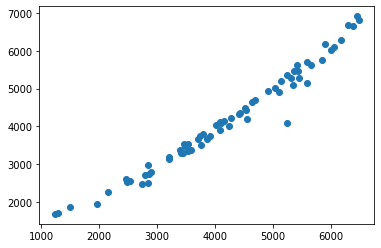

In [52]:
plt.scatter(y1_prediction,y1_test)

# Dataset A1-synthetic

In [12]:
df2 = pd.read_csv('A1-synthetic.txt', sep='\t')
df2

,#v1,v2,v3,v4,v5,v6,v7,v8,v9,z
0,37.344110,10.542156,0.969185,3.568534,96.798733,3.429026,75.810196,0,20.002459,11.805369
1,4.089849,11.894301,0.467775,1.279044,100.149383,3.190073,76.423095,0,12.702628,5.125025
2,-32.333439,10.968631,0.238486,1.410745,100.642074,3.093934,78.758727,1,10.723848,3.218553
3,-45.632977,11.509606,0.924938,3.404069,105.963016,2.884269,83.027750,0,19.946593,12.955092
4,-41.543394,10.117186,0.315180,1.020120,97.371423,2.815820,77.194463,0,11.105024,1.919094
...,...,...,...,...,...,...,...,...,...,...
995,3.792427,10.567199,0.912737,3.909415,98.701308,3.222058,77.648206,0,18.903414,11.265913
996,-15.036910,11.639085,0.988515,3.202736,107.622269,3.236556,84.364686,0,21.473280,15.061569
997,3.448645,10.819087,0.798970,3.763737,100.801840,2.326508,79.251359,0,17.006395,11.029825
998,44.874246,10.272157,0.061187,1.267862,99.931950,2.979643,79.454761,0,10.138457,1.580719


### Creation of training and test datasets

In [13]:
#separate the other attributes from the predicting attribute
x2 = df2.drop('z', axis=1)
#separte the predicting attribute into Y for model training 
y2 = df2['z']

In [14]:
# splitting the data
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.2, random_state=42)

### Prediction

In [15]:
# creating an object of LinearRegression class
LR2 = LinearRegression()
# fitting the training data
LR2.fit(x2_train,y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
y2_prediction =  LR2.predict(x2_test)
y2_prediction

array([ 7.39991214,  3.56951761,  3.20559574, 14.2419913 ,  3.21646823,
       12.91723843, 14.06445299,  3.19953733,  8.07077154,  7.50225568,
        8.52411306, 12.31139347,  0.99222533,  8.95939896, 13.0210878 ,
        6.77379705, 11.04859771, 13.74923511,  7.63194176,  3.34818779,
        4.92521511,  2.02208176, 10.1635507 ,  2.88378399,  6.11991475,
        8.70111258,  2.24287424, 12.22127391,  1.50704127, 14.84772316,
       12.41166841,  3.33777851,  2.74614364,  7.66156827,  5.33302555,
        2.5641576 ,  2.99460066,  8.88678528,  8.08124781,  4.16640299,
        2.60392291,  6.24340357,  6.59999409, 11.92205633,  4.265465  ,
        7.60996761,  2.99791115,  2.42236628, 10.74685094, 11.73790288,
        6.62253004,  9.34134346, 11.00795357,  4.75899318,  5.63361677,
        2.18705024,  4.07388088,  3.66968525,  8.30340001, 14.48312018,
        3.79762604,  1.83905311, 10.24007857,  5.76481639,  9.56031192,
        3.21701442,  1.61607751,  4.09407281,  8.51337364,  8.06

### Cross validation

In [17]:
scores2 = cross_val_score(LR2, x2, y2, cv=5)
scores2

array([0.9720814 , 0.97437945, 0.97300237, 0.97219717, 0.97691594])

In [18]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores2.mean(), scores2.std()))

0.97 accuracy with a standard deviation of 0.00


### Relative Absolute Error

In [19]:
error_rate2 = 100 * ((sum(abs(y2_prediction-y2_test)))/sum(y2_test));
print("Error rate MLR : ",error_rate2 , "%")

Error rate MLR :  7.756081824450678 %


### Creation of the Dataset

In [20]:
dataset2 = pd.DataFrame({'prediction' : y2_prediction, 'real_value' : y2_test})

In [21]:
dataset2.to_csv('A1-synthetic_Results.csv',index=False)

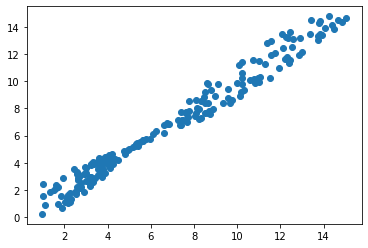

In [38]:
plt.scatter(y2_prediction,y2_test)

# Dataset Final_insurance_dataset

In [22]:
df = pd.read_csv('Final_insurance_dataset.csv')
df

,age,bmi,children,smoker,charges,IsFemale,IsMale
0,0.021739,0.371847,0.00,1,0.325308,1,0
1,0.000000,0.554656,0.25,0,0.012458,0,1
2,0.217391,0.530676,0.75,0,0.068673,0,1
3,0.326087,0.210059,0.00,0,0.430549,0,1
4,0.304348,0.402367,0.00,0,0.056649,0,1
...,...,...,...,...,...,...,...
1304,0.695652,0.467456,0.75,0,0.195615,0,1
1305,0.000000,0.497041,0.00,0,0.022373,1,0
1306,0.000000,0.650576,0.00,0,0.010483,1,0
1307,0.065217,0.306447,0.00,0,0.018286,1,0


### Creation of training and test datasets

In [23]:
#separate the other attributes from the predicting attribute
x = df.drop(['charges'], axis=1)
#separte the predicting attribute into Y for model training 
y = df['charges']

In [24]:
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

### Prediction

In [25]:
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
y_prediction =  LR.predict(x_test)
y_prediction

array([ 2.99717380e-01,  2.37718744e-01,  5.48990521e-01, -1.28333977e-02,
        1.65282875e-01,  2.13198624e-01,  1.96203652e-01,  6.78903435e-01,
        3.05675891e-01,  1.27203298e-01,  1.10265115e-01,  1.34651136e-01,
        1.31902895e-02,  2.68740057e-01,  2.11051923e-01,  2.09175325e-01,
        6.15733616e-01,  9.43450015e-02,  2.23388099e-01,  1.76310195e-01,
        1.81667882e-01,  6.23474469e-01,  1.68265827e-01,  5.64253263e-01,
        6.77916729e-02,  2.26422833e-01,  5.43069046e-02,  6.15142660e-01,
        6.66685341e-02,  1.80773884e-01,  3.42213965e-01,  9.38192623e-02,
        5.63540691e-01,  2.18280764e-02,  1.06918596e-01,  1.08759083e-01,
        9.92107498e-02,  2.02906225e-01,  1.63995167e-01,  1.18010497e-01,
        6.61415974e-01,  2.56186025e-01,  2.82224497e-02,  1.55680301e-01,
        1.42417678e-02,  7.12701781e-01,  5.59259613e-01,  1.51773921e-01,
       -3.09025976e-02,  3.25439150e-01,  1.00885798e-01,  3.10964621e-01,
        2.89192441e-03,  

### Cross validation

In [27]:
scores = cross_val_score(LR, x, y, cv=5)
scores

array([0.76266023, 0.7128933 , 0.77893527, 0.72844385, 0.76730718])

In [28]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.75 accuracy with a standard deviation of 0.03


### Relative Absolute Error

In [29]:
error_rate = 100 * ((sum(abs(y_prediction-y_test)))/sum(y_test));
print("Error rate MLR : ",error_rate , "%")

Error rate MLR :  32.235375028907384 %


### Creation of the Dataset

In [31]:
dataset3 = pd.DataFrame({'prediction' : y_prediction, 'real_value' : y_test})

In [32]:
dataset3.to_csv('Final_insurance_dataset_Results.csv',index=False)

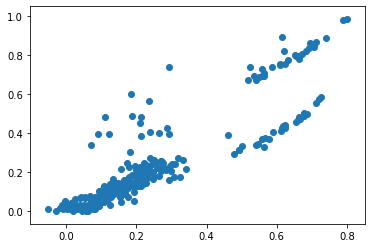

In [40]:
plt.scatter(y_prediction,y_test)